# Algoritmos Evolutivos - Ejemplo en Python

Este notebook muestra cómo funciona un algoritmo evolutivo (Genetic Algorithm) paso a paso, usando como ejemplo la función $f(x) = x \cdot \sin(x)$.

## Caracteristicas del Algoritmo

### Representación

Se usan vectores reales (números continuos), no cadenas binarias como en los algoritmos genéticos.

Ejemplo: una solución puede ser 
[𝑥1,𝑥2,...,𝑥𝑛][x1	​,x2...,xn].

### Operadores evolutivos

Mutación: es el operador principal. Se agrega ruido gaussiano a las variables.

𝑥′=𝑥+𝑁(0,𝜎2)x′= x+N(0,σ2)

Recombinación (opcional): combina padres, pero se usa menos que en los algoritmos genéticos.

Selección: se eligen los mejores entre padres e hijos.

Autoadaptación de parámetros:

La varianza 
𝜎
σ de la mutación también evoluciona junto con la solución, lo que permite ajustar automáticamente el “tamaño de paso” de la búsqueda.


### Ejemplo clásico de notación

Se escribe como:

(μ/ρ,λ)-ES

- 𝜇: número de padres.
- 𝜌: número de padres que se recombinan.
- 𝜆: número de descendientes.

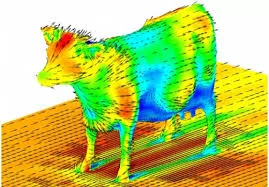

### Librerias Importadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problema a Resolver

Maximixar la [Sphere Function] o [Sum of Squares]

In [ ]:
# Minimizar f(x) = x * sin(x) on [0,10]
def fitness(x):
    return np.sum(x * np.sin(x))

### Inicialización usando tipo (1+1)-ES
- Cada padre genera 1  hijo por mutación.
- Solo los hijos compiten, los padres no sobreviven.

### ¿Cuando usar este modelo?

El problema es simple o de baja dimensión.

No necesitas explorar mucho, solo refinar una solución.

Quieres mostrar el concepto básico de evolución (para enseñanza/demostración).

📌 Ejemplo: Ajustar un único parámetro de un modelo físico.

Best solution found: [-0.00821697  0.02680221]
Fitness: 0.0007858768589145998


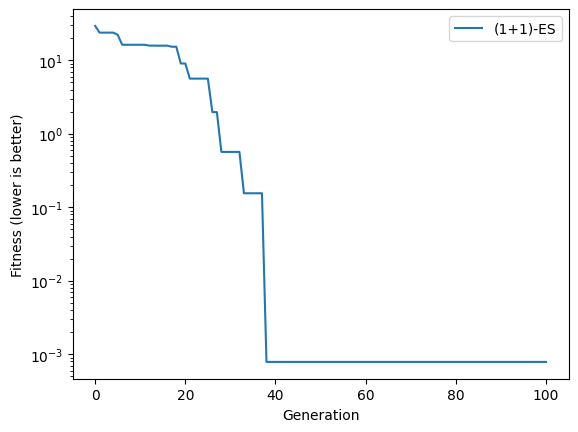

In [ ]:
# --- Parameters ---
DIM = 2                # dimension of problem
GENS = 100             # number of generations
SIGMA = 0.9            # mutation strength
SEED = 42              # random seed for reproducibility 

rng = np.random.default_rng(SEED)

parent = rng.normal(0, 5, size=DIM)   # random start point
parent_fit = fitness(parent)

history = [parent_fit]

# --- (1+1)-ES loop ---
for gen in range(GENS):
    # Mutation: add Gaussian noise
    child = parent + rng.normal(0, SIGMA, size=DIM)
    child_fit = fitness(child)
    
    # Selection: keep best (minimization)
    if child_fit < parent_fit:
        parent, parent_fit = child, child_fit
    
    history.append(parent_fit)

# --- Results ---
print("Best solution found:", parent)
print("Fitness:", parent_fit)

# --- Plot fitness evolution ---
plt.plot(history, label="(1+1)-ES")
plt.xlabel("Generation")
plt.ylabel("Fitness (lower is better)")
plt.yscale("log")   # log scale to show fast convergence
plt.legend()
plt.show()

### Representación Gráfica

- Eje X → Generaciones (0 a GENS).
- Eje Y (log) → Fitness mínima de cada generación, en escala logarítmica.
- Curva → Cómo mejora el mejor individuo con cada generación. La línea representa history_mu_lambda, que almacena el fitness mínimo de cada generación.

### Comportamiento

#### Inicio (generación 0-10)

- Los padres se inicializan con rng.normal(0,5), por lo que sus valores están muy dispersos y la fitness es alta.
- En la gráfica se ve una caída rápida porque las mutaciones generan hijos mucho más cercanos al mínimo global (0).

#### Medio (generación 10-50)

- La mejora sigue ocurriendo, pero más lenta, ya que los hijos comienzan a agruparse cerca del mínimo y las mutaciones solo producen refinamientos pequeños.
- La gráfica se aplaca gradualmente, mostrando un comportamiento de explotación sobre la mejor zona encontrada.

#### Final (generación 50-100)

- La fitness se estabiliza cerca de cero, ya que el algoritmo ha convergido al mínimo global de la función sum(x**2).
- La gráfica casi se hace horizontal, indicando que las mutaciones ya no logran mejoras significativas y la solución ha alcanzado un óptimo aproximado.

### Inicialización usando (μ+λ)-ES

- De μ padres se generan λ hijos,
- Compiten padres + hijos juntos, los mejores sobreviven.

### ¿Cuando usar este modelo?

El problema es muy ruidoso o difícil, y quieres explorar bien el espacio.

Quieres diversidad en las soluciones (porque los padres no sobreviven).

Necesitas evitar que la población se quede atrapada en óptimos locales.

📌 Ejemplo: Optimizar funciones con muchas irregularidades o con múltiples óptimos locales (como en aerodinámica o problemas de ingeniería).

Best solution (μ,λ): [-0.11452824  0.07557174]
Fitness: 0.01882780437382036


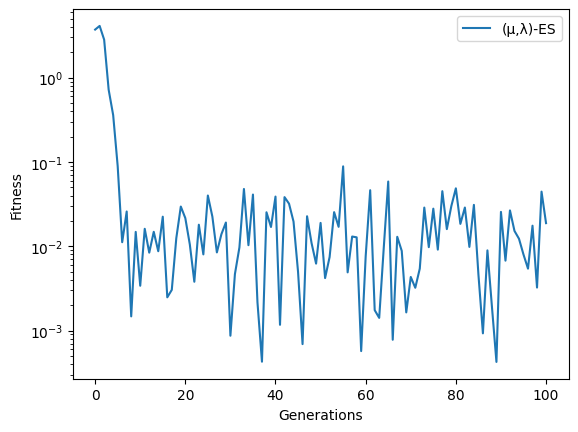

In [ ]:
# Parameters
MU = 10       # number of parents
LAMBDA = 40   # number of offspring
GENS = 100    # number of generations
SIGMA = 0.5   # mutation strength

# Initialization
parents = rng.normal(0, 5, size=(MU, DIM))
parent_fits = np.apply_along_axis(fitness, 1, parents)

history_mu_lambda = [parent_fits.min()]

# (μ,λ)-ES loop
for gen in range(GENS):
    offspring = []
    for _ in range(LAMBDA):
        p = parents[rng.integers(0, MU)]
        child = p + rng.normal(0, SIGMA, size=DIM)
        offspring.append(child)
    offspring = np.array(offspring)
    
    # Evaluate offspring
    offspring_fits = np.apply_along_axis(fitness, 1, offspring)
    
    # Select best μ offspring
    best_idx = np.argsort(offspring_fits)[:MU]
    parents, parent_fits = offspring[best_idx], offspring_fits[best_idx]
    
    history_mu_lambda.append(parent_fits.min())

# Results
print("Best solution (μ,λ):", parents[0])
print("Fitness:", parent_fits.min())

plt.plot(history_mu_lambda, label="(μ,λ)-ES")
plt.yscale("log")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.show()

### Representación Grafica

- Eje X → Generaciones (0 a GENS).
- Eje Y (log) → Fitness mínima de cada generación, en escala logarítmica.
- Curva → Cómo mejora el mejor individuo con cada generación.

### Comportamiento

#### Inicio (generación 0-10)
- Los padres están muy dispersos (sigma(0,5)), así que la fitness es alta.
- En la gráfica se ve una caída rápida porque las mutaciones generan algunos hijos mucho más cercanos al mínimo.

#### Medio (generación 10-50)
- La mejora sigue, pero más lenta, porque los hijos ya están cerca del mínimo y las mutaciones producen mejoras más pequeñas.
- La gráfica se aplana gradualmente.

#### Final (generación 50-100)
- La fitness se estabiliza cerca de cero (o un valor muy bajo).

### Inicialización usando (μ+λ)-ES

- De μ padres se generan λ hijos, 
- Compiten padres + hijos juntos, los mejores sobreviven.

### ¿Cuando usar este modelo?

Quieres estabilidad y un balance entre exploración y explotación.

El problema tiene dimensión más alta o requiere conservar buenas soluciones.

Buscas converger de manera más segura, incluso si puede ser más lento.

📌 Ejemplo: Optimización de hiperparámetros en machine learning, donde quieres conservar configuraciones buenas mientras sigues probando nuevas.

Best solution (μ+λ): [-0.00656665  0.00727323]
Fitness: 9.6020820144311e-05


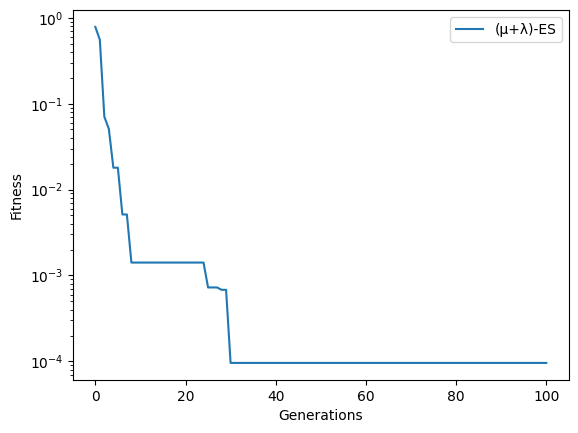

In [11]:
# Parameters
MU = 10
LAMBDA = 40
GENS = 100
SIGMA = 0.5

# Initialization
parents = rng.normal(0, 5, size=(MU, DIM))
parent_fits = np.apply_along_axis(fitness, 1, parents)

history_mu_plus_lambda = [parent_fits.min()]

# (μ+λ)-ES loop
for gen in range(GENS):
    offspring = []
    for _ in range(LAMBDA):
        p = parents[rng.integers(0, MU)]
        child = p + rng.normal(0, SIGMA, size=DIM)
        offspring.append(child)
    offspring = np.array(offspring)
    
    # Evaluate offspring
    offspring_fits = np.apply_along_axis(fitness, 1, offspring)
    
    # Combine parents + offspring
    combined = np.vstack((parents, offspring))
    combined_fits = np.concatenate((parent_fits, offspring_fits))
    
    # Select best μ
    best_idx = np.argsort(combined_fits)[:MU]
    parents, parent_fits = combined[best_idx], combined_fits[best_idx]
    
    history_mu_plus_lambda.append(parent_fits.min())

# Results
print("Best solution (μ+λ):", parents[0])
print("Fitness:", parent_fits.min())

plt.plot(history_mu_plus_lambda, label="(μ+λ)-ES")
plt.yscale("log")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.show()

### Representación Gráfica

- Eje X → Generaciones (0 a GENS).
- Eje Y (log) → Fitness mínima de cada generación, en escala logarítmica.
- Curva → Cómo mejora el mejor individuo con cada generación. La línea representa history_mu_plus_lambda, que almacena el fitness mínima considerando la combinación de padres + hijos.

### Comportamiento

#### Inicio (generación 0-10)

- Los padres se inicializan con rng.normal(0,5), así que la fitness inicial es alta.
- La gráfica muestra una caída rápida, porque las mutaciones generan hijos mucho más cercanos al mínimo global y además los padres originales pueden seguir contribuyendo.

#### Medio (generación 10-50)

- La mejora continúa, aunque más lentamente, ya que los hijos y los padres se agrupan cerca del mínimo.
- La ventaja del (μ+λ) sobre (μ,λ) es que los padres pueden sobrevivir si son mejores que los hijos, haciendo que la caída de la curva sea más suave y estable.

#### Final (generación 50-100)

- La fitness se estabiliza cerca de cero, convergiendo al mínimo global de la función sum(x**2).
- La gráfica se aplaca horizontalmente, indicando que tanto los padres como los hijos han alcanzado una solución óptima o casi óptima.